<a href="https://colab.research.google.com/github/salonii1030/GUVI-Machine_Learning-Task_7/blob/main/Random_Forest_Assignment_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd

**Importing the dataset**

In [2]:
df = pd.read_csv("/content/Social_Network_Ads.csv")

In [3]:
df = df.drop(['User ID','Gender'],axis = 1)

In [4]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [5]:
df.drop_duplicates()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
df.dtypes

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [7]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split
X = df[['Age','EstimatedSalary']].values
y = df['Purchased'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

**Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

**Predicting the Test set results**

In [11]:
y_pred = rf.predict(X_test)

**Making the Confusion Matrix**

In [12]:
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
print(con)

[[78  5]
 [ 3 34]]


**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


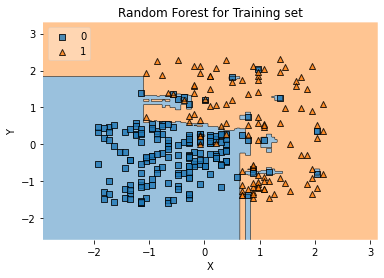

In [16]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_train, y_train, clf = rf, legend=2) 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Forest for Training set')
plt.show() 

**Visualising the Test set results**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


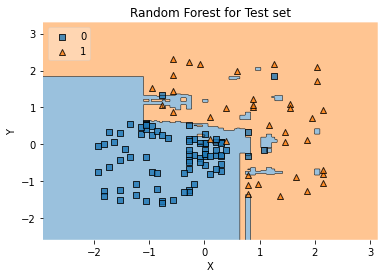

In [17]:
plot_decision_regions(X_test, y_test, clf = rf, legend=2) 
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Forest for Test set')
plt.show() 